In [9]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import japanize_matplotlib

In [10]:
df_e = pd.read_excel('sample_table/sampleExcel.xlsx', header=0)
df_e.head(5)

,duration,event,subgroup
0,14,1,Pembro
1,368,0,Pembro
2,276,0,Pembro
3,357,0,Pembro
4,403,0,Pembro


In [25]:
style_list = ['solid', 'dashed', 'dashdot', 'dotted']

Text(0, 0.5, '生存率')

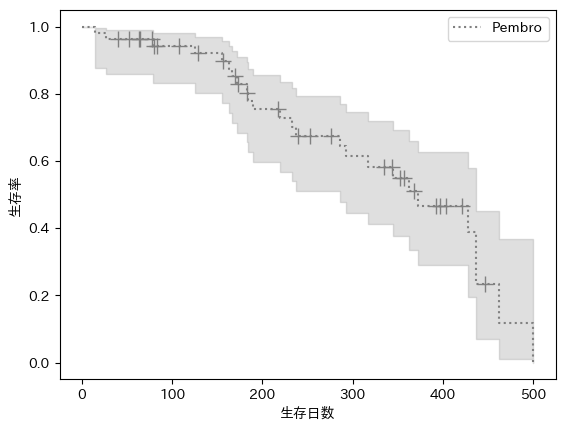

In [24]:
pem = df_e[df_e['subgroup']=='Pembro']
kmf = KaplanMeierFitter()
kmf.fit(durations=pem.duration, event_observed=pem.event, label='Pembro')
kmf.plot(show_censors=True, ci_show=True,color='gray', linestyle='dotted')

plt.xlabel('生存日数')
plt.ylabel('生存率')

In [29]:
subgroup = list(set(df_e.subgroup))
len(subgroup)

3

In [30]:
subgroup

['chemo', 'Pembro', 'Pembro+chemo']

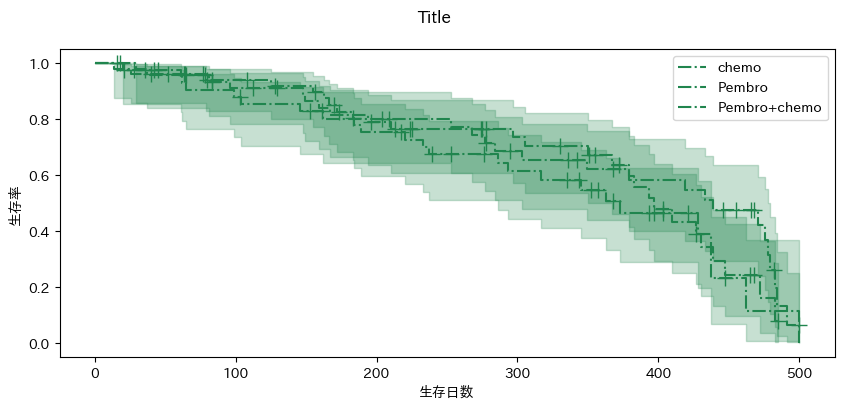

In [54]:
if len(subgroup) > 0:
    plt.figure(figsize=(10, 4))
    plt.suptitle(str('Title'))

    
    
    for group in subgroup:
        df = df_e[df_e.subgroup==group]
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df.duration, event_observed=df.event, label=group)
        kmf.plot(show_censors=True, ci_show=True,color='#20854EFF', linestyle=style_list[i])
    
    plt.xlabel('生存日数')
    plt.ylabel('生存率')        
    plt.plot()

In [55]:
lancet_cp = ['#00468BFF', '#ED0000FF', '#42B540FF', '#0099B4FF']
nejm_cp = ['#BC3C29FF', '#0072B5FF', '#E18727FF', '#20854EFF']

In [89]:
def draw_km(df:pd.DataFrame, color:str or list='gray', size=(8, 4), by_subgroup:bool=True, 
            title:str='Kaplan Meier Curve', xlabel:str='生存日数', ylabel='生存率', 
            censor:bool=True, ci:bool=False):
    
    subgroup = list(set(df_e.subgroup))
    fig, ax = plt.subplots(figsize=size)
    plt.suptitle(title)
    
    if (len(subgroup) > 0) and by_subgroup: 
        for i, group in enumerate(subgroup):
            df_ = df[df.subgroup==group]
            kmf = KaplanMeierFitter()
            kmf.fit(durations=df_.duration, event_observed=df_.event, label=group)
            if color == 'gray':  
                kmf.plot(show_censors=censor, ci_show=ci, color=color, linestyle=style_list[i])
            else:
                kmf.plot(show_censors=censor, ci_show=ci, color=color[i])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)            
        plt.plot()
                
    
    else:
        kmf = KaplanMeierFitter()
        kmf.fit(durations=df.duration, event_observed=df.event)
        if color == 'gray': 
            kmf.plot(show_censors=censor, ci_show=ci, color=color, label='_nolegend_')
        else:
            kmf.plot(show_censors=censor, ci_show=ci, color=color[0], label='_nolegend_')
            
        
        plt.gca.legend_ = None
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)     
        plt.plot()   
    
    

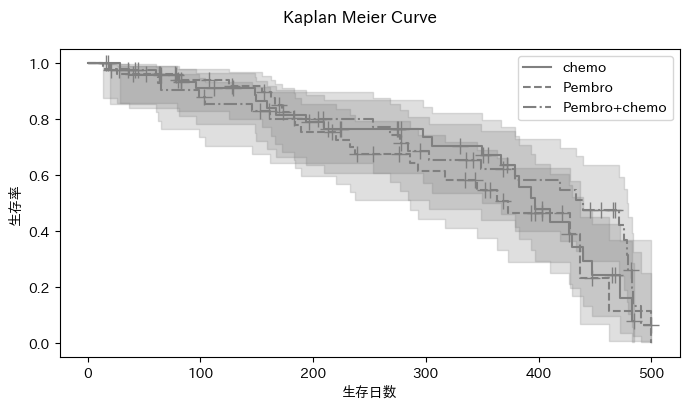

In [88]:
draw_km(df_e, by_subgroup=True, color='gray')